## Data
We will be using the 2017 wave of the HCMST survey - provided as `HCMST_couples.rds`. The file `HCMST_variable_descriptions.pdf` contains most of the variable descriptions and coding of responses.

## Tasks

### 1. Dating Trends Over Time

a) Visualize how the mode of meeting for the first time has changed over the years. Create two (2) charts in this section to highlight some important pattern(s).

b) Create an alternative visualization of the same data. Discuss which visualization you recommend to the editor and why. Rely on at least three specific data visualization principles or theories discussed in class to justify your choice.


In [11]:

import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

result = pyreadr.read_r('HCMST_couples.rds')
df = result[list(result.keys())[0]]  


/opt/anaconda3/lib/python3.12/site-packages/pyreadr/_pyreadr_parser.py:283: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df = self.df.replace({colname: labels})
/opt/anaconda3/lib/python3.12/site-packages/pyreadr/_pyreadr_parser.py:283: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df = self.df.replace({colname: labels})


In [12]:
df.info

<bound method DataFrame.info of       CaseID  CASEID_NEW      qflag  weight1  weight1_freqwt  weight2  \
0         11     2936569  Qualified   0.7752         60727.0      NaN   
1         28     1946291  Qualified   1.6552        129664.0      NaN   
2         37     2106585  Qualified   1.2118         94929.0      NaN   
3         38     2963787  Qualified   1.0422         81643.0      NaN   
4         42     2962195  Qualified      NaN             NaN   0.8783   
...      ...         ...        ...      ...             ...      ...   
3396    4304     1228389  Qualified      NaN             NaN   0.6463   
3397    4305     2480357  Qualified      NaN             NaN   1.1856   
3398    4307     2090075  Qualified      NaN             NaN   0.7724   
3399    4309     2914837  Qualified      NaN             NaN   0.6082   
3400    4311     2747613  Qualified      NaN             NaN   0.5909   

      weight1a  weight1a_freqwt  weight_combo  weight_combo_freqwt  ...  \
0       0.7708  

In [13]:
df['w6_relationship_end_nonmar'].value_counts()
#df.head(5)

w6_relationship_end_nonmar
We broke up                                377
[Partner Name] passed away, is deceased     30
Name: count, dtype: int64

In [14]:
df.columns.to_list()


['CaseID',
 'CASEID_NEW',
 'qflag',
 'weight1',
 'weight1_freqwt',
 'weight2',
 'weight1a',
 'weight1a_freqwt',
 'weight_combo',
 'weight_combo_freqwt',
 'duration',
 'speed_flag',
 'consent',
 'xlgb',
 'S1',
 'S2',
 'S3',
 'DOV_Branch',
 'Q3_Refused',
 'Q4',
 'Q5',
 'Q6A',
 'Q6B',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q14',
 'Q15A7',
 'Q16',
 'Q16_Refused',
 'Q17A',
 'Q17B',
 'Q17C',
 'Q17D',
 'Q19',
 'Q20',
 'Q21A_Year',
 'Q21A_Month',
 'Q21B_Year',
 'Q21B_Month',
 'Q21C_Year',
 'Q21C_Month',
 'Q21D_Year',
 'Q21D_Month',
 'w6_identity',
 'w6_outness',
 'w6_outness_timing',
 'Q23',
 'Q24_Refused',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'w6_friend_connect_1',
 'w6_friend_connect_2',
 'w6_friend_connect_3',
 'w6_friend_connect_4',
 'w6_friend_connect_Refused',
 'Q32',
 'Q34',
 'Q35_Refused',
 'w6_sex_frequency',
 'w6_otherdate',
 'w6_how_many',
 'w6_how_meet_Refused',
 'w6_otherdate_app',
 'w6_how_many_app',
 'Past_Partner_Q1',
 'w6_relationship_end_nonmar',
 'w6_breakup_nonmar',
 'w6_relationship

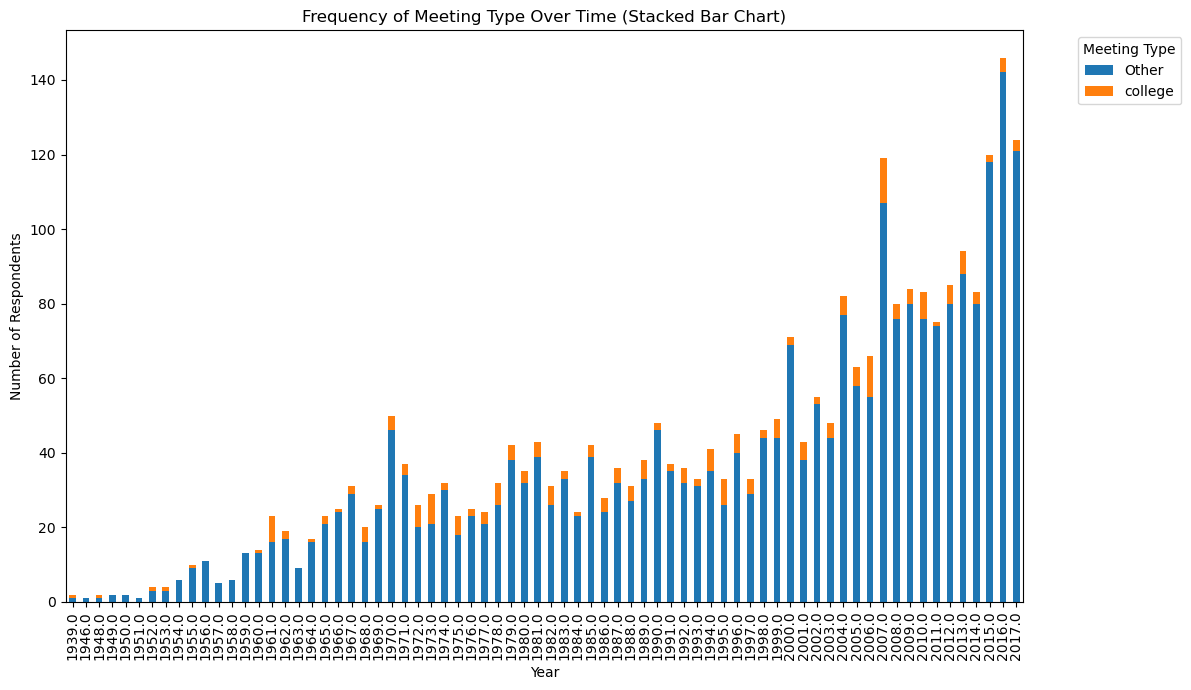

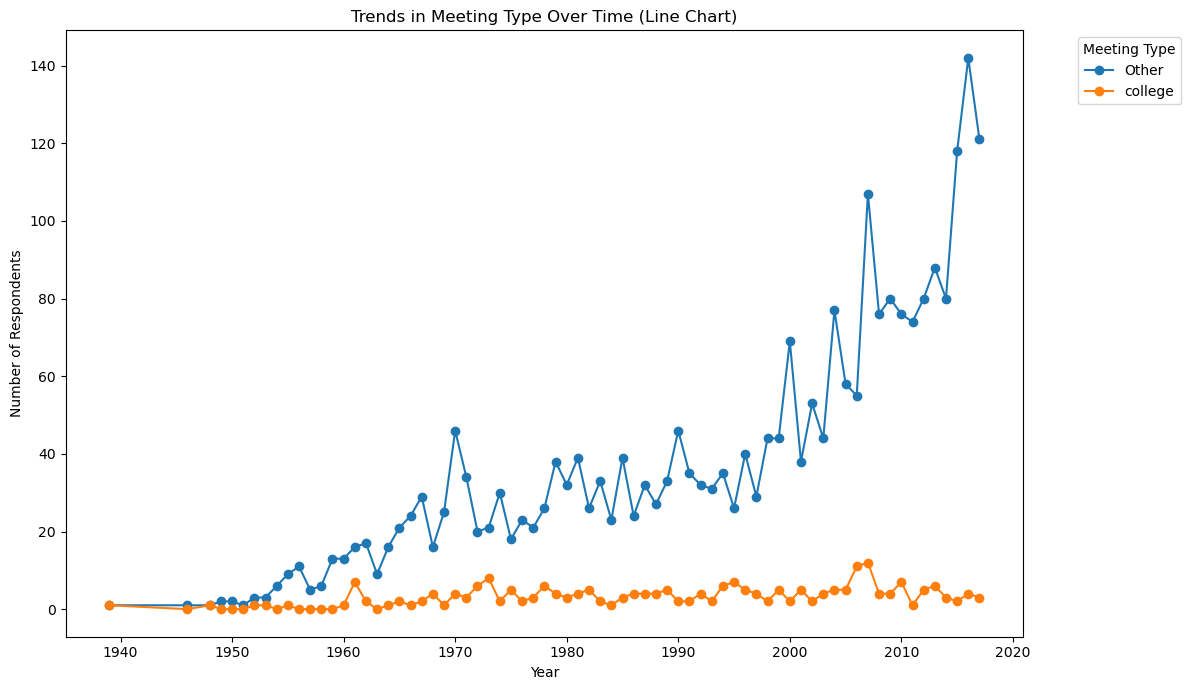

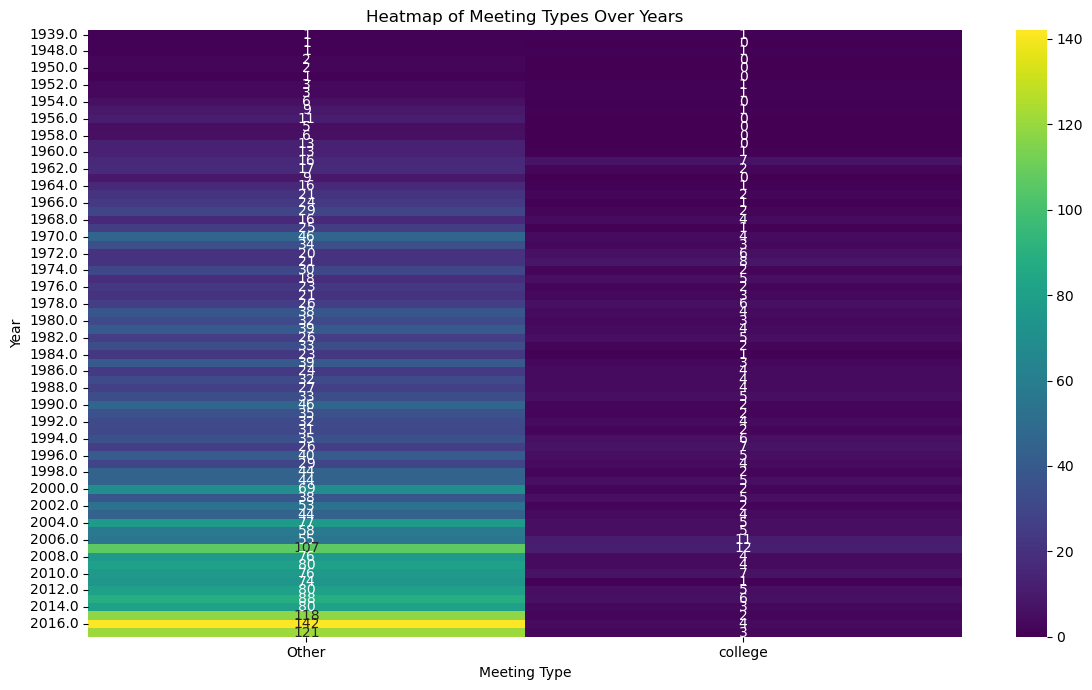

In [15]:
mapping = {
    'High School': 'grade school',
    'Middle School': 'grade school',
    'Elementary': 'grade school',
    'College': 'college',
    'University': 'college',
    'Neighbor': 'neighbors',
    'Local Bar': 'bar',
    'Night Club': 'bar',
    'Workplace': 'work',
    'Office': 'work',
    'Online Dating': 'online',
    'Dating App': 'online'
}

df['meeting_type_simplified'] = df['meeting_type'].map(mapping).fillna('Other')

df['meeting_date'] = pd.to_datetime(df['Q21A_Year'].astype(str) + '-' + df['Q21A_Month'].astype(str) + '-01', errors='coerce')

df['meeting_year'] = pd.to_numeric(df['Q21A_Year'], errors='coerce')

grouped_year = df.groupby(['meeting_year', 'meeting_type_simplified']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
grouped_year.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Frequency of Meeting Type Over Time (Stacked Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Number of Respondents')
plt.legend(title='Meeting Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
for meeting_type in grouped_year.columns:
    plt.plot(grouped_year.index, grouped_year[meeting_type], marker='o', label=meeting_type)
plt.title('Trends in Meeting Type Over Time (Line Chart)')
plt.xlabel('Year')
plt.ylabel('Number of Respondents')
plt.legend(title='Meeting Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.heatmap(grouped_year, annot=True, fmt="d", cmap='viridis')
plt.title('Heatmap of Meeting Types Over Years')
plt.xlabel('Meeting Type')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

I recommend the stacked bar chart, this chart efficiently uses space by encoding both the total number of respondents per year and the proportion of each meeting type, maximizing data-to-ink ratio. This chart leverages distinct color segments to represent each meeting type, which meet the pre-attentive principle. Also, The stacked bar chart uses a clean, minimalist design that avoids decorative elements, which meet the principle of avoiding chart junk.

### 2. Age is Just a Number

a) Create one (1) visualization to show the relationship between a respondent's age and their partner's age, accounting for the gender of the respondent? Identify the main pattern in the graph via an annotation directly added to the plot.

_Hint_: `ppage` is the survey respondent's age, `Q9` captures the partner's age, `ppgender` is the gender of the respondent. 

b) Use Edward Tufte's principles to critique the plot above. Which of the changes would improve the plot in your opinion?


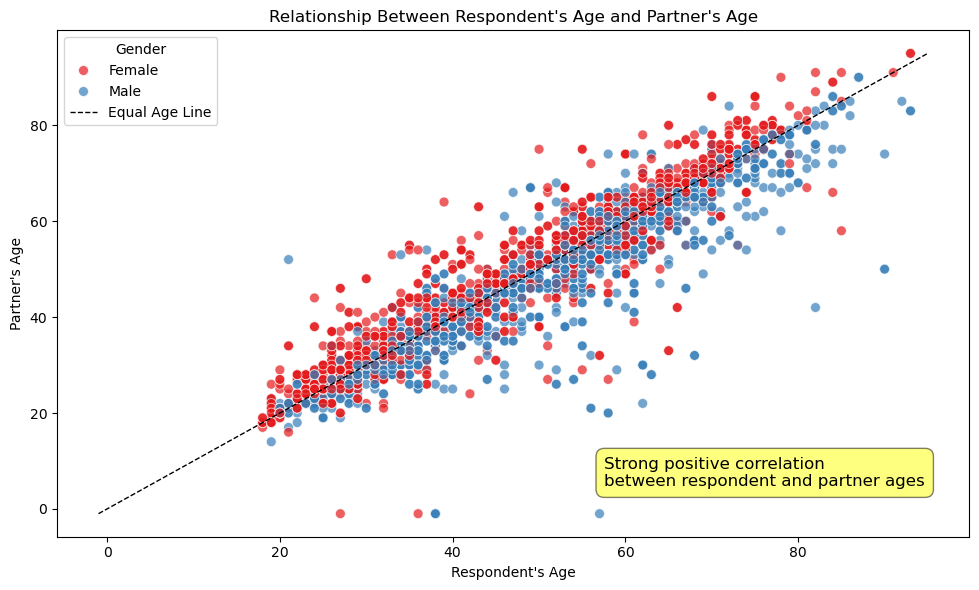

In [16]:
df_age = df[['ppage', 'Q9', 'ppgender']].dropna()
df_age = df_age.rename(columns={'ppage': 'Respondent_Age', 'Q9': 'Partner_Age', 'ppgender': 'Gender'})

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_age, 
    x='Respondent_Age', 
    y='Partner_Age', 
    hue='Gender', 
    palette='Set1', 
    alpha=0.7, 
    s=50
)

min_age = min(df_age['Respondent_Age'].min(), df_age['Partner_Age'].min())
max_age = max(df_age['Respondent_Age'].max(), df_age['Partner_Age'].max())
plt.plot([min_age, max_age], [min_age, max_age], color='black', linestyle='--', linewidth=1, label='Equal Age Line')

plt.annotate(
    'Strong positive correlation\nbetween respondent and partner ages',
    xy=(0.6, 0.1), xycoords='axes fraction',
    fontsize=12, color='black',
    bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5)
)

plt.title("Relationship Between Respondent's Age and Partner's Age")
plt.xlabel("Respondent's Age")
plt.ylabel("Partner's Age")
plt.legend(title='Gender', loc='best')
plt.tight_layout()
plt.show()

Make the color of points less trasparent, since in the plot, overlapped points have different colors, such as purple, which are Chartjunk than need to be removed. The bounding box around the annotation isn’t essential, removing or simplifying it will keep the viewer’s attention on the data itself, therefore maximizing the Data-to-Ink ratio.

### 3. Politics and Dating

a) Explore how the political affiliation of partners affects how couples meet and stay together. Create two (2) charts in this section. Make sure to use some variation in the type of visualizations. Discuss which visualization you recommend to your editor and why.

b) Write a short narrative (~150 words) based on your visualization, integrating data insights with a compelling story. This narrative should be suitable for a feature article, highlighting key findings and their implications.

/var/folders/46/fdrjqjdn3jq9yg03908v7r_80000gn/T/ipykernel_59282/2860454553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='political_match', y='duration', data=df, palette='Set2')


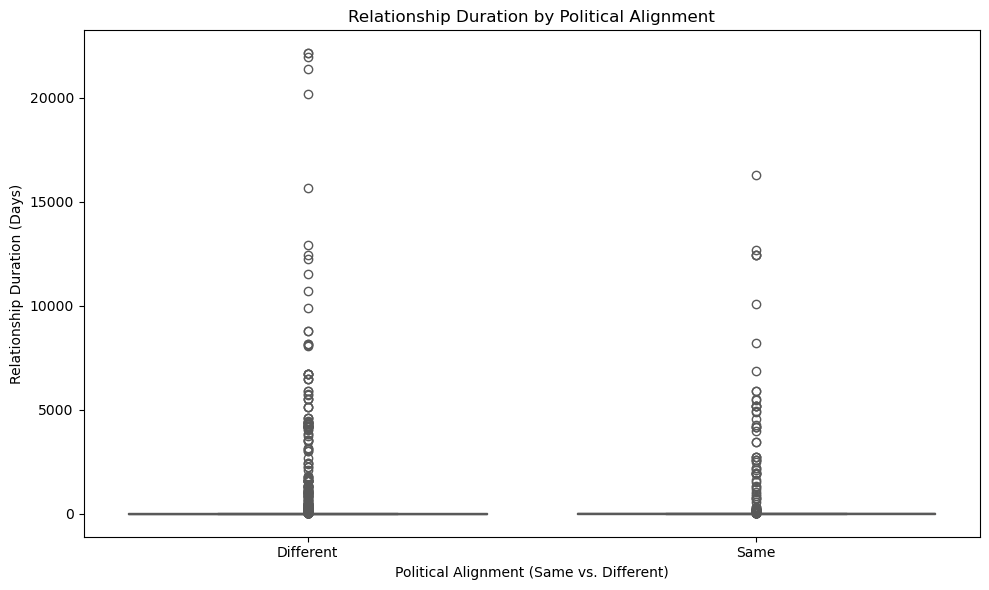

<Figure size 1200x700 with 0 Axes>

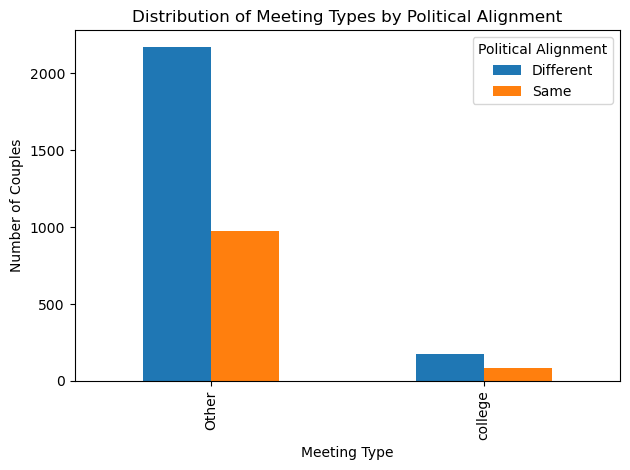

In [17]:
df = df.dropna(subset=['partyid7', 'w6_q12'])

df['political_match'] = df.apply(lambda row: 'Same' if row['partyid7'] == row['w6_q12'] else 'Different', axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='political_match', y='duration', data=df, palette='Set2')
plt.title("Relationship Duration by Political Alignment")
plt.xlabel("Political Alignment (Same vs. Different)")
plt.ylabel("Relationship Duration (Days)")
plt.tight_layout()
plt.show()

mapping = {
    'High School': 'grade school',
    'Middle School': 'grade school',
    'Elementary': 'grade school',
    'College': 'college',
    'University': 'college',
    'Neighbor': 'neighbors',
    'Local Bar': 'bar',
    'Night Club': 'bar',
    'Workplace': 'work',
    'Office': 'work',
    'Online Dating': 'online',
    'Dating App': 'online'
}
df['meeting_type_simplified'] = df['meeting_type'].map(mapping).fillna('Other')


meeting_counts = df.groupby(['political_match', 'meeting_type_simplified']).size().reset_index(name='count')

meeting_pivot = meeting_counts.pivot(index='meeting_type_simplified', columns='political_match', values='count').fillna(0)

plt.figure(figsize=(12, 7))
meeting_pivot.plot(kind='bar')
plt.title("Distribution of Meeting Types by Political Alignment")
plt.xlabel("Meeting Type")
plt.ylabel("Number of Couples")
plt.legend(title='Political Alignment', loc='upper right')
plt.tight_layout()
plt.show()


Shared values between partners may influence relationship longevity. Our analysis reveals that couples with the same political affiliation tend to experience longer-lasting relationships compared to those with differing views. These patterns invite us to consider political affiliation as a key, yet often overlooked factor in relational success. 
Although political alignment alone is not necessarily a relationship deal-breaker, but it could play a significant role in how couples navigate long-term compatibility. 
Meanwhile, when it comes to how couples first meet, the “Other” category remains the most common avenue for both same- and different-alignment couples, overshadowing more traditional settings like college. These insights point to a complex interplay between shared ideology and modern dating behaviors. The findings encourage a nuanced view, reminding us that every couple’s journey is shaped by multiple factors—political or otherwise.

### 4. Your Turn to Choose

There are lots of other variables that could make for an interesting story, for example, educational background differences, relationship stages (First Met, Romantic, Live together & Married), regional patterns, relationship break ups, sexual behavior etc. Select some variables of your choice to tell a story that captures an interesting insight into the data.

Create one (1) chart in this section to highlight some important patterns. Briefly discuss which visualization you recommend to your editor, why you think the visualization is useful, and which patterns it serves to highlight.


/var/folders/46/fdrjqjdn3jq9yg03908v7r_80000gn/T/ipykernel_59282/400634554.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_breakup = df_edu.groupby('ppeduc')['w6_relationship_end_nonmar'].mean().reset_index()
/var/folders/46/fdrjqjdn3jq9yg03908v7r_80000gn/T/ipykernel_59282/400634554.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_breakup, x='ppeduc', y='breakup_rate', palette='Blues_d')


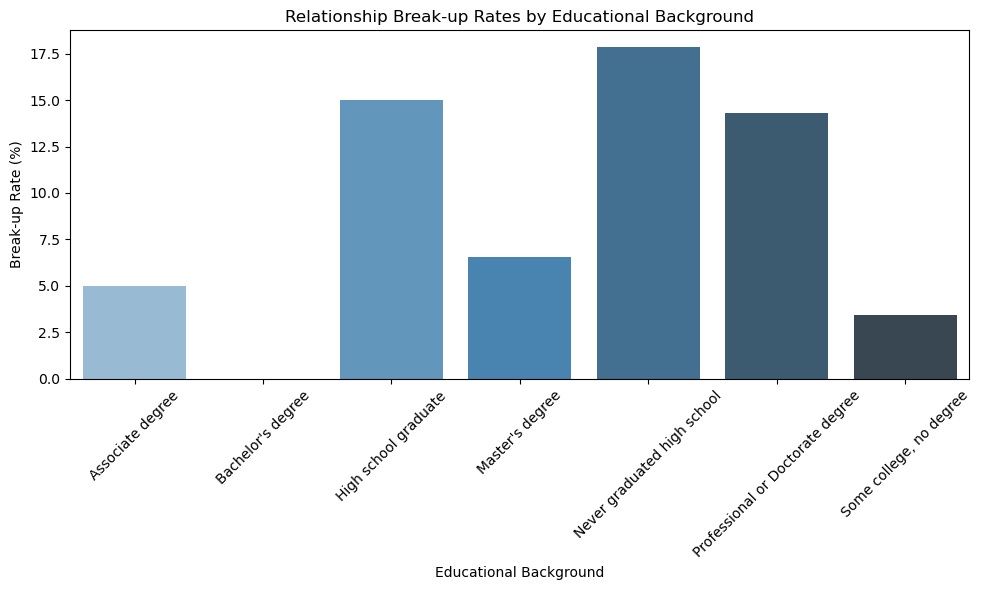

In [18]:

import numpy as np

df_edu = df[['ppeduc', 'w6_relationship_end_nonmar']].dropna()
df_edu['w6_relationship_end_nonmar'] = np.where(df_edu['w6_relationship_end_nonmar'] == 'We broke up', 0, 1)#broke up = 0

edu_breakup = df_edu.groupby('ppeduc')['w6_relationship_end_nonmar'].mean().reset_index()
edu_breakup['breakup_rate'] = edu_breakup['w6_relationship_end_nonmar'] * 100

edu_breakup = edu_breakup.sort_values('ppeduc')

plt.figure(figsize=(10, 6))
sns.barplot(data=edu_breakup, x='ppeduc', y='breakup_rate', palette='Blues_d')
plt.title("Relationship Break-up Rates by Educational Background")
plt.xlabel("Educational Background")
plt.ylabel("Break-up Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar chart highlights the variation in relationship break-up rates across different educational backgrounds. The visualization shows, for each education category, the percentage of respondents who experienced a non-marital break-up. I recommend this chart to the editor because it adheres to Tufte’s principle of maximizing the data-to-ink ratio, and allows readers to quickly compare categories. The design also leverages pre-attentive processing: distinct bars in varying shades of blue make differences easily noticeable. The chart highlights an important pattern: educational background may be linked to relationship stability. This insight prompts further discussion on whether socioeconomic factors or shared values associated with different educational levels influence how couples navigate relationship challenges.


### 5. Make Two Plots Interactive

a) Choose 2 of the plots you created above and add interactivity. For at least one of these interactive plots, this should not be done through the use of `ggplotly` 

b) Briefly describe to the editor why interactivity in these visualizations is particularly helpful for a reader, referencing user engagement theories or interaction design principles.


In [19]:
import altair as alt
import pandas as pd

df_age = df[['ppage', 'Q9', 'ppgender']].dropna().rename(
    columns={'ppage': 'Respondent_Age', 'Q9': 'Partner_Age', 'ppgender': 'Gender'}
)

scatter_chart = alt.Chart(df_age).mark_circle(size=60).encode(
    x=alt.X('Respondent_Age', scale=alt.Scale(zero=False)),
    y=alt.Y('Partner_Age', scale=alt.Scale(zero=False)),
    color='Gender',
    tooltip=['Respondent_Age', 'Partner_Age', 'Gender']
).interactive().properties(
    width=600,
    height=400,
    title='Interactive Scatter Plot: Respondent Age vs. Partner Age'
)

scatter_chart


alt.Chart(...)

Interactivity in data visualizations allows readers to engage with the information on their own terms. By enabling features like hovering, zooming, or filtering, readers can quickly focus on areas of personal interest, explore relationships more deeply, and form their own insights. This aligns with user engagement theories, which emphasize empowering users to actively interact with the data. Interaction design principles also show that when people can manipulate or customize what they see, they become more immersed and retain information better, since they’re actively constructing knowledge rather than simply absorbing it.

### 6. Data Table

To allow the reader to explore the survey data by themselves a bit, select a few useful variables, rename them appropriately for the table to be self-explanatory, and add an interactive data table to the output. Make sure the columns are clearly labeled. Select the appropriate options for the data table (e.g. search bar, sorting, column filters, in-line visualizations etc. -- as far as the tools supplied in lecture allow).


In [21]:
import pandas as pd


df_table = df[['ppage', 'Q9', 'ppeduc', 'ppgender', 'partyid7']].dropna().rename(columns={
    'ppage': 'Respondent Age',
    'Q9': 'Partner Age',
    'ppeduc': 'Respondent Education',
    'ppgender': 'Respondent Gender',
    'partyid7': 'Political Affiliation'
})

from itables import show
show(
    df_table,
    scrollX=True,         
    paging=True,        
    searching=True,      
    columnFilters=True,   
    sortable=True,        
)
